# Кучубин Андрей Тестовое задание: Младший дата-аналитик

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Задача 1: Выявление аномалий в данных о посещениях сайта**

У вас есть данные о посещениях сайта за последние 10 дней. Необходимо выявить аномалии в количестве уникальных пользователей.


In [2]:
data = {
    'date': ['2024-10-01', '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-05', '2024-10-06', '2024-10-07', '2024-10-08', '2024-10-09', '2024-10-10'],
    'unique_visitors': [200, 220, 250, 240, 10000, 230, 245, 240, 235, 50]
}

**Задача:**
1.	Проведите анализ данных:
* Определите, есть ли выбросы в количестве уникальных посетителей сайта.
* Если есть, укажите их и предложите возможные причины появления таких выбросов.


Создадим DataFrame на основе предоставленных данных.

In [22]:
df = pd.DataFrame(data)
df

,date,unique_visitors
0,2024-10-01,200
1,2024-10-02,220
2,2024-10-03,250
3,2024-10-04,240
4,2024-10-05,10000
5,2024-10-06,230
6,2024-10-07,245
7,2024-10-08,240
8,2024-10-09,235
9,2024-10-10,50


Для лучшего понимания распределения уникальных посетителей визуализируем данные.

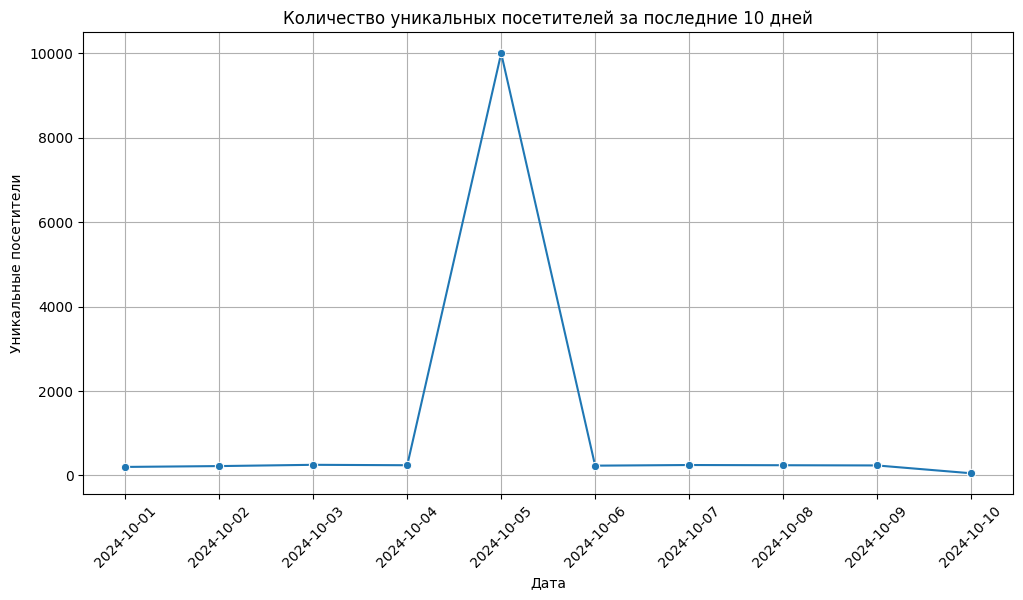

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='unique_visitors', data=df, marker='o')
plt.title('Количество уникальных посетителей за последние 10 дней')
plt.xlabel('Дата')
plt.ylabel('Уникальные посетители')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Для выявления выбросов можно использовать метод межквартильного размаха (IQR).

In [27]:
Q1 = df['unique_visitors'].quantile(0.25)
Q3 = df['unique_visitors'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['unique_visitors'] < lower_bound) | (df['unique_visitors'] > upper_bound)]
print('Выбросы:')
outliers

Выбросы:


,date,unique_visitors
4,2024-10-05,10000
9,2024-10-10,50


**Выводы:**

В данном наборе данных выбросами являются значения:
* 10000 (5 октября)
* 50 (10 октября)

Возможные причины появления выбросов:
* 10000 уникальных посетителей:
    * Это может быть связано с рекламной кампанией или вирусным контентом, который привлек большое количество пользователей в один день.
    * Также возможно наличие технической ошибки или бот-трафика.
* 50 уникальных посетителей:
    * Это может указывать на сбой в работе сайта или на выходной день, когда трафик значительно снижается.
    * Также возможно, что сайт был недоступен для пользователей в этот день.

**Задача 2: SQL запрос для анализа активности пользователей**

У вас есть таблица сессий пользователей на сайте, которая называется sessions, и содержит следующие поля:

session_id | user_id | session_start | session_end | session_duration
---------- | ------- | ------------- | ----------- | ----------------
1 | 100 | 2024-08-01 10:00 | 2024-08-01 10:45 | 45
2 | 101 | 2024-08-01 11:00 | 2024-08-01 11:30 | 30
... | ... | ... | ... | ...

**Задача:**
1.	Напишите SQL-запрос, который вернет:
* Среднюю продолжительность сессии для каждого пользователя.
* Пользователей, которые провели на сайте больше 100 минут за день.


In [28]:
'''
SELECT user_id,
       AVG(session_duration) AS average_duration
FROM sessions
GROUP BY user_id;
'''

'\nSELECT user_id,\n       AVG(session_duration) AS average_duration\nFROM sessions\nGROUP BY user_id;\n'

In [ ]:
'''
SELECT user_id,
       DATE(session_start) AS session_date,
       SUM(session_duration) AS total_duration
FROM sessions
GROUP BY user_id, DATE(session_start)
HAVING SUM(session_duration) > 100;
'''

**Задача 3: Аномалия в охвате сайта**

Вы видите, что у сайта был аномально высокий охват в день X (например, посещения выросли в 5 раз по сравнению с предыдущими днями). Ваша задача — предложить план действий для выяснения причин.

**Задача:**
1.	Опишите, какие шаги вы предпримете для анализа ситуации?
2.	Какие инструменты и подходы вы будете использовать для проверки данных?


**Ответ:**

Шаги для анализа ситуации:
1. Сбор данных о трафике:

Использую Google Analytics или Яндекс.Метрику для получения полной информации о посещаемости: источниках трафика, географии пользователей, времени на сайте и других метриках.

2. Анализ источников трафика:

Определю, какие источники (поиск, социальные сети, реферальные ссылки) привлекли больше всего посетителей. Это поможет понять, откуда пришли новые пользователи.

3. Проверка изменений на сайте:

Проверю, были ли внесены изменения на сайте в преддверии аномального роста: обновления контента, изменения в SEO-оптимизации или запуск рекламных кампаний.

4. Анализ поведения пользователей:

Изучу поведение пользователей на сайте: количество отказов, среднее время на странице и количество просмотренных страниц. Это поможет понять, насколько качественным был трафик.

5. Проверка на наличие бот-трафика:

Использую инструменты для выявления ботов и подозрительного трафика. Например, Google Analytics предоставляет возможность фильтрации ботов.

6. Мониторинг упоминаний в СМИ и социальных сетях:

Проверю, были ли упоминания о сайте в новостях или социальных сетях, которые могли привести к всплеску интереса.

7. Сравнительный анализ с конкурентами:

Использую сервисы вроде SimilarWeb для сравнения данных о трафике вашего сайта с конкурентами и выявления общих тенденций.

**Задача 4: Обработка данных о приложении**

Представьте, что вы работаете с данными о сессиях мобильного приложения. Данные включают такие поля, как:

session_id | user_id | platform | session_start | session_end | session_duration
---------- | ------- | -------- | ------------- | ----------- | ----------------
1 | 100 | iOS | 2024-09-01 10:00 | 2024-09-01 10:45 | 45
2 | 101 | Android | 2024-09-01 11:00 | 2024-09-01 11:30 | 30
... | ... | ... | ... | ... | ...

**Задача:**
1.	Используя PySpark (или Python, если с PySpark нет опыта), напишите код, который:
- Считает количество уникальных пользователей для каждой платформы (iOS, Android).
- Определяет среднюю продолжительность сессии для каждой платформы.


In [ ]:
'''
# Подсчет уникальных пользователей по платформам
users_count = df.groupby('platform')['user_id'].nunique().reset_index()

# Переименование столбца для ясности
users_count.columns = ['platform', 'users_count']
'''

In [ ]:
'''
# Подсчет уникальных пользователей по платформам
mean_session_duration = df.groupby('platform')['session_duration'].mean().reset_index()

# Переименование столбца для ясности
mean_session_duration.columns = ['platform', 'mean_session_duration']
'''

**Задача 5: Аномалия в среднедневном времени посещения на пользователя**

Вы видите, что среднедневное время пользователей на сайте Х за октябрь 2024 года упало с 15 до 3 минут. Ваша задача — предложить план действий для выяснения причин.
Среднее время пользователей за месяц считается как общее время всех пользователей на сайте за месяц, разделенное на количество дней и количество пользователей сайта за месяц.

**Задача:**

1.	Опишите, какие шаги вы предпримете для анализа ситуации?
2.	Опишите, что может стать причиной такого снижения времени?
3.	Какие инструменты и подходы вы будете использовать для проверки данных?


**Ответ:**

### Шаги для анализа ситуации

1. Сбор и анализ данных:

Изучу статистику посещаемости сайта за октябрь по сравнению с предыдущими месяцами. Использую инструменты аналитики (например, Google Analytics, Яндекс.Метрика) для получения информации о времени на сайте, источниках трафика и показателях отказов.

2. Проведу сегментацию пользователей по различным критериям (география, устройство, источник трафика) для выявления паттернов.

3. Анализ изменений на сайте:

Проверю, были ли внесены изменения в дизайн, структуру или контент сайта в последние месяцы. Это может включать обновления интерфейса, изменение навигации или удаление популярных страниц.
Оценю влияние изменений на поведенческие факторы пользователей.

4. Оценка технических характеристик:

Измерю скорость загрузки страниц с помощью инструментов, таких как Google PageSpeed Insights или GTMetrix. Замедление загрузки может привести к высокому уровню отказов.

5. Проверю наличие ошибок (например, 404 или 503) и доступность сайта.

6. Обратная связь от пользователей:

Проведу опросы или использую инструменты для сбора отзывов от пользователей о их опыте на сайте. Это поможет выявить проблемы с юзабилити или контентом.

### Возможные причины снижения времени
1. Технические проблемы:

Низкая скорость загрузки страниц может привести к тому, что пользователи не дожидаются загрузки контента и покидают сайт.

2. Ошибки на сайте (например, недоступные страницы) также могут вызывать недовольство пользователей.

3. Изменения в контенте или дизайне:

Обновления, которые ухудшают навигацию или делают сайт менее удобным для пользователя, могут снизить время пребывания.

4. Устаревший или неактуальный контент может не привлекать внимание посетителей.

5. Конкуренция и интерес аудитории:

Увеличение конкуренции или изменение интересов целевой аудитории могут привести к снижению посещаемости и времени на сайте.

6. Сезонность предложения также может влиять на активность пользователей.

### Инструменты и подходы для проверки данных

1. Аналитические инструменты:

* Google Analytics и Яндекс.Метрику для отслеживания ключевых метрик: время на сайте, уровень отказов, глубина просмотра.

* Анализ отчетов о поведении пользователей и источниках трафика.

2. Тестирование производительности:
* Google PageSpeed Insights и GTMetrix для оценки скорости загрузки страниц и выявления проблемных зон.

3. Сбор обратной связи:

* Опросы и формы обратной связи на сайте для получения мнений пользователей о юзабилити и контенте.